## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [6]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from datetime import datetime, timedelta

In [7]:
df = pd.read_csv('AAPL.csv') # data_importing
df.head(10) # printing first 10 rows 

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


## STEP 2 : GATHERING INSIGHTS AND CLEANING DATA


In [8]:
# shape of data
print("Shape of data:",df.shape) #dimensions of table

Shape of data: (1258, 15)


In [9]:
# printing summary of the csv file
df.describe()# prints count, mean, std, min etc.

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [10]:
# summary of data
df.info()
#info is used for
#The total number of non-null values in each column.
#The data type of each column.
#The memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [11]:
# checking null values
df.isnull().sum()


Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

No null values

In [12]:
df = df[['date','open','close']] # Extracting required columns, replaces the original df to only contain these 3 values


In [13]:
df.head(5)

,date,open,close
0,2015-05-27 00:00:00+00:00,130.34,132.045
1,2015-05-28 00:00:00+00:00,131.86,131.780
2,2015-05-29 00:00:00+00:00,131.23,130.280
3,2015-06-01 00:00:00+00:00,131.20,130.535
4,2015-06-02 00:00:00+00:00,129.86,129.960


In [14]:
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) 
# converting object dtype of date column to datetime dtype
#also split the values and removed redundant date
df.set_index('date',drop=True,inplace=True) # Setting date column as index
#the 'date' column will become the index, and you will no longer have it as a regular column in the DataFrame.
df.head(10)

,open,close
date,,
2015-05-27,130.34,132.045
2015-05-28,131.86,131.780
2015-05-29,131.23,130.280
2015-06-01,131.20,130.535
2015-06-02,129.86,129.960
2015-06-03,130.66,130.120
2015-06-04,129.58,129.360
2015-06-05,129.50,128.650
2015-06-08,128.90,127.800


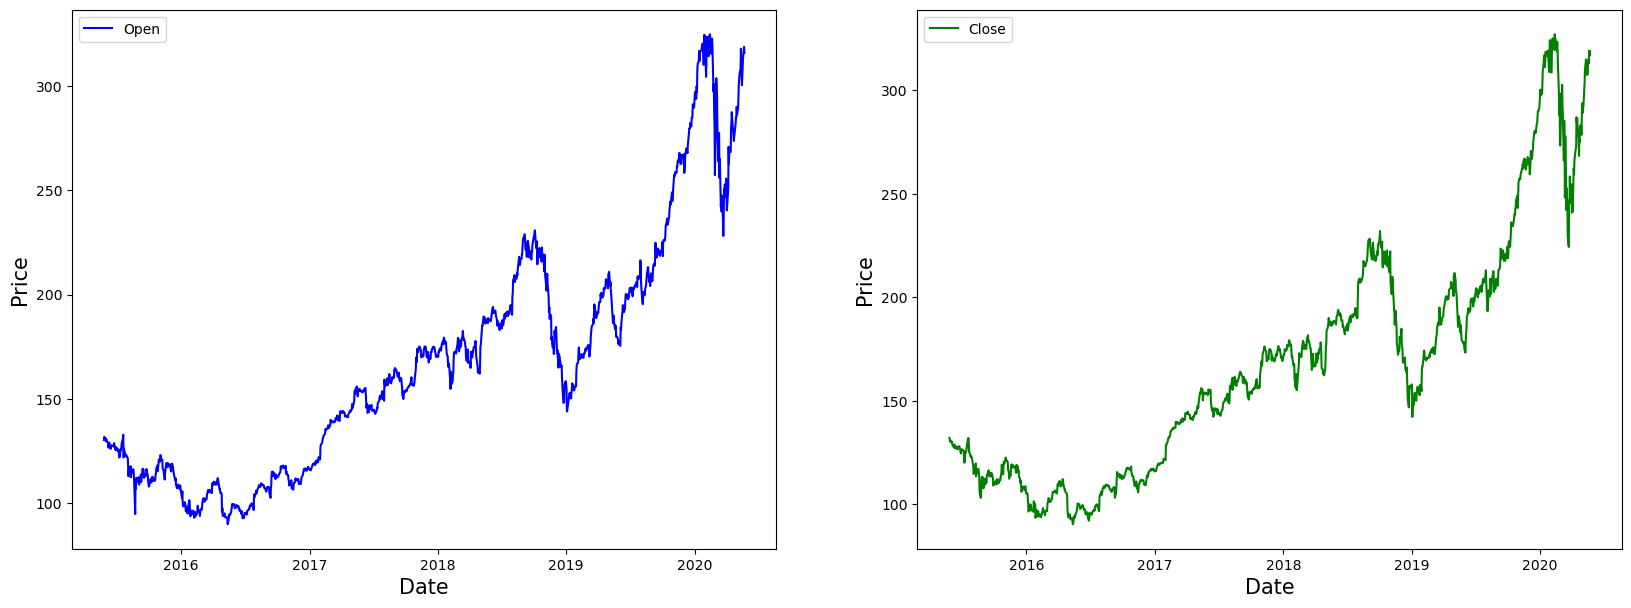

In [15]:
# plotting open and closing price on date index
# the markings on x and y axis are done automatically by the data
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend() # for the open tag in top left

ax[1].plot(df['close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend() # close tag on top left of right graph

fig.show()

## STEP 3 : DATA PRE-PROCESSING

In [16]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler() #sklearn
#converts values to range them between 0 and 1, uses formula orig-min/max-min
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2015-05-27,0.171857,0.176074
2015-05-28,0.178333,0.174956
2015-05-29,0.175649,0.168623
2015-06-01,0.175521,0.169699
2015-06-02,0.169812,0.167272
2015-06-03,0.173220,0.167947
2015-06-04,0.168619,0.164739
2015-06-05,0.168278,0.161741
2015-06-08,0.165722,0.158152


In [17]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [18]:
train_data = df[:training_size]# 0 to training_size
test_data  = df[training_size:]# training_size to end

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [19]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))
#in a nutshell takes 50 rows(sequence) and 51st value(label) and passes them as an array.

In [20]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape
#printing out dimensions for these arrays/list

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

## STEP 4 :  CREATING LSTM MODEL

In [21]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Importing Libraries:

model = Sequential(): This line initializes a sequential model, which is a linear stack of layers in Keras. In a sequential model, you can add layers one after the other.
Adding Layers to the Model:

model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])): This line adds an LSTM (Long Short-Term Memory) layer to the model. Here's what each parameter means:

units=50: This LSTM layer has 50 units, which are essentially the number of memory cells or neurons in the layer.
return_sequences=True: This parameter indicates that the LSTM layer should return sequences as output. This is common when you have multiple sequential layers stacked on top of each other.
input_shape=(train_seq.shape[1], train_seq.shape[2]): Specifies the input shape of the data. train_seq is a NumPy array that contains sequences of data. train_seq.shape[1] represents the number of time steps in each sequence, and train_seq.shape[2] is the number of features in each time step.
model.add(Dropout(0.1)): This line adds a dropout layer with a dropout rate of 0.1 (10%). Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 during training.

model.add(LSTM(units=50): Another LSTM layer with 50 units is added. This layer doesn't have return_sequences=True, so it doesn't return sequences but produces a fixed-length output.

model.add(Dense(2): This line adds a fully connected dense layer with 2 units. This layer typically represents the output layer of the model. The choice of 2 units suggests that this model might be used for a regression task with two output values.

Compiling the Model:

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error']): This line compiles the model. Here's what each parameter means:
loss='mean_squared_error': The loss function used for training the model. In this case, it's the mean squared error, which is commonly used for regression tasks.
optimizer='adam': The optimizer used for updating the model's weights during training. Adam is a popular optimization algorithm.
metrics=['mean_absolute_error']: Metrics used to evaluate the model during training. Here, it tracks the mean absolute error, which is another regression metric.
Displaying Model Summary:

model.summary(): This line prints a summary of the model's architecture, including the number of parameters in each layer
          

In [23]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)
# The epochs parameter specifies the number of times the entire training dataset is passed forward and backward through the neural network. 
#In this case, the model is trained for 100 epochs, meaning it will iterate through the entire training data 100 times.

Epoch 1/100
28/28 [==============================] - 0s 15ms/step - loss: 4.4033e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0037 - val_mean_absolute_error: 0.0481
Epoch 2/100
28/28 [==============================] - 0s 15ms/step - loss: 4.8528e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0088 - val_mean_absolute_error: 0.0785
Epoch 3/100
28/28 [==============================] - 0s 15ms/step - loss: 4.9252e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0059 - val_mean_absolute_error: 0.0636
Epoch 4/100
28/28 [==============================] - 0s 15ms/step - loss: 4.3742e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0043 - val_mean_absolute_error: 0.0516
Epoch 5/100
28/28 [==============================] - 0s 15ms/step - loss: 4.3629e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0040 - val_mean_absolute_error: 0.0515
Epoch 6/100
28/28 [==============================] - 0s 15ms/step - loss: 4.2596e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0025 - val_mean_absolute_error:

28/28 [==============================] - 0s 15ms/step - loss: 2.4470e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0011 - val_mean_absolute_error: 0.0243
Epoch 50/100
28/28 [==============================] - 0s 15ms/step - loss: 2.3728e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0017 - val_mean_absolute_error: 0.0325
Epoch 51/100
28/28 [==============================] - 0s 15ms/step - loss: 2.5681e-04 - mean_absolute_error: 0.0114 - val_loss: 0.0016 - val_mean_absolute_error: 0.0321
Epoch 52/100
28/28 [==============================] - 0s 15ms/step - loss: 2.3478e-04 - mean_absolute_error: 0.0112 - val_loss: 0.0012 - val_mean_absolute_error: 0.0260
Epoch 53/100
28/28 [==============================] - 0s 15ms/step - loss: 2.6687e-04 - mean_absolute_error: 0.0117 - val_loss: 8.8250e-04 - val_mean_absolute_error: 0.0204
Epoch 54/100
28/28 [==============================] - 0s 15ms/step - loss: 2.2611e-04 - mean_absolute_error: 0.0108 - val_loss: 9.5531e-04 - val_mean_absolute_error

28/28 [==============================] - 0s 16ms/step - loss: 1.6580e-04 - mean_absolute_error: 0.0091 - val_loss: 6.7806e-04 - val_mean_absolute_error: 0.0182
Epoch 98/100
28/28 [==============================] - 0s 16ms/step - loss: 1.9330e-04 - mean_absolute_error: 0.0099 - val_loss: 6.5314e-04 - val_mean_absolute_error: 0.0176
Epoch 99/100
28/28 [==============================] - 0s 16ms/step - loss: 1.8887e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0011 - val_mean_absolute_error: 0.0257
Epoch 100/100
28/28 [==============================] - 0s 15ms/step - loss: 1.5740e-04 - mean_absolute_error: 0.0089 - val_loss: 6.6023e-04 - val_mean_absolute_error: 0.0179


In [24]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]
#model.predict(...): This is a method used to make predictions using a trained Keras model. 
   # It takes the test data (test_seq) as input and returns the model's predictions for that data.

9/9 [==============================] - 0s 4ms/step


array([[0.50352746, 0.49495307],
       [0.4918456 , 0.4831133 ],
       [0.48236033, 0.47361884],
       [0.47109216, 0.4624283 ],
       [0.4416424 , 0.43292174]], dtype=float32)

In [25]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5] #print first 5
#mms=min max scaler

array([[208.19301, 207.57458],
       [205.45093, 204.77022],
       [203.22444, 202.52136],
       [200.57947, 199.87077],
       [193.66673, 192.88185]], dtype=float32)

## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

In [26]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [27]:
# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2019-05-08,201.900,202.90,208.193008,207.574585
2019-05-09,200.400,200.72,205.450928,204.770218
2019-05-10,197.419,197.18,203.224442,202.521362
2019-05-13,187.710,185.72,200.579468,199.870773
2019-05-14,186.410,188.66,193.666733,192.881851


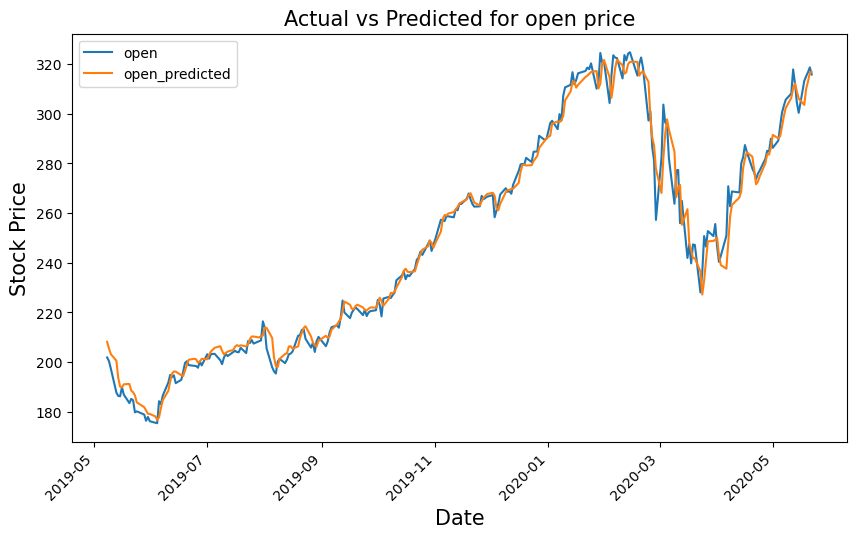

In [28]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

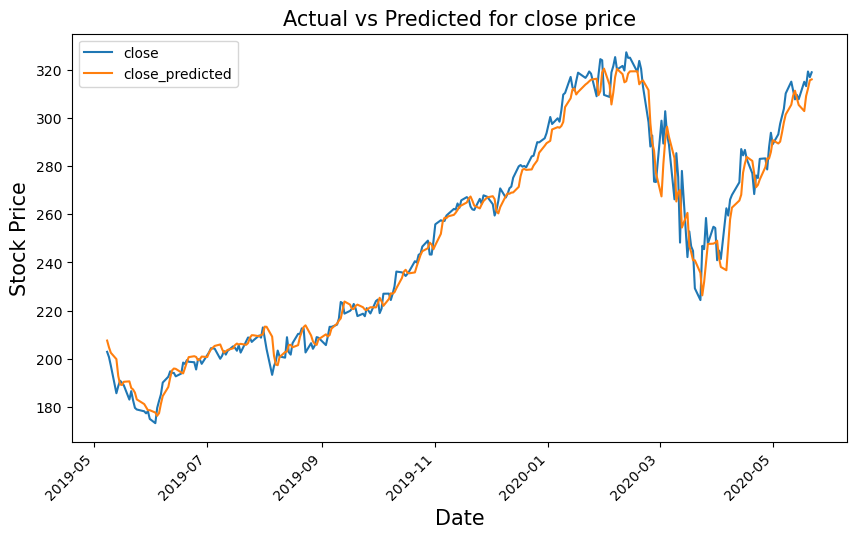

In [29]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)   
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP 6. PREDICTING UPCOMING 10 DAYS

In [30]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.add(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2020-05-20':'2020-05-27']

,open,close,open_predicted,close_predicted
2020-05-20,NaN,NaN,NaN,NaN
2020-05-21,NaN,NaN,NaN,NaN
2020-05-22,NaN,NaN,NaN,NaN
2020-05-23,NaN,NaN,NaN,NaN
2020-05-24,NaN,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN,NaN
2020-05-26,NaN,NaN,NaN,NaN
2020-05-27,NaN,NaN,NaN,NaN


In [31]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [32]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 8ms/step


In [33]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

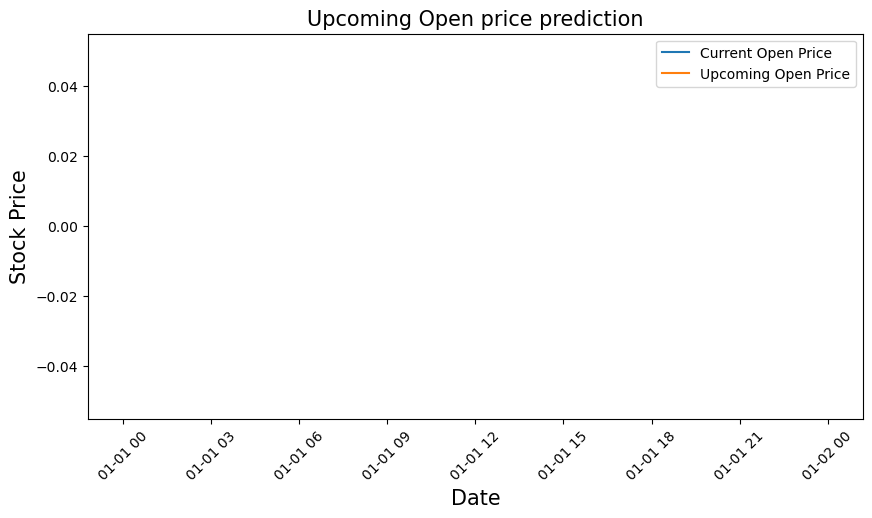

In [37]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

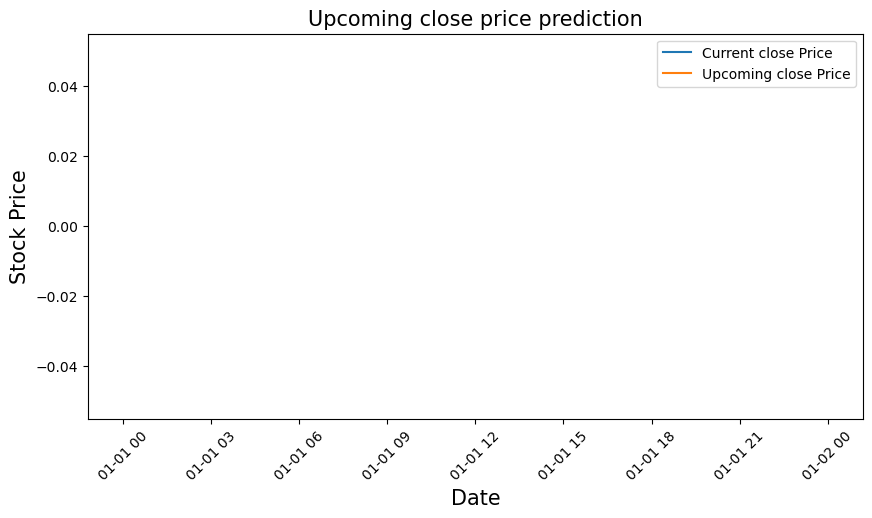

In [36]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# THANK YOU!